### Case Study Problem

We have a warehouse `navigating` AI autonomous robot, that can travel to the locations on the map of he warehouse to either collect or drop the items. We will find the shortest possible route to the destination location from our current location.

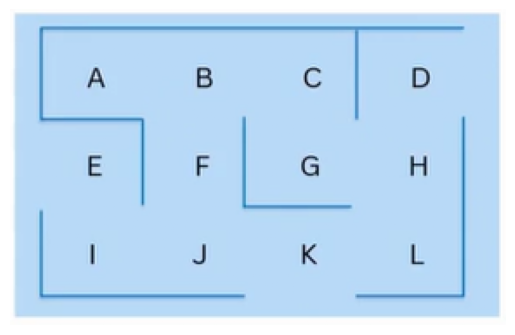

In [21]:
import matplotlib.pyplot as plt
img_path = "images/case-study.png"
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### Pre-setup

In [27]:
# importing libraries
import numpy as np

In [28]:
# setup important parameters
gamma = 0.75
alpha = 0.9

### Part 1. Defining the Environment

We begin by defining these states with a dictionary mapping the locations (A to L) into the states (index from 0-11)

In [29]:
# defining the satates
location_to_state = {
    "A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7, "I": 8, "J": 9, "K": 10, "L": 11, 
} 

In [30]:
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

Suppose we need to stop at `G` for now, consider it the location from where our AI robot will pick some stuff.

In [31]:
# define the Rewards
R = np.array([
    [0,1,0,0,0,0,0,0,0,0,0,0], # A
    [1,0,1,0,0,1,0,0,0,0,0,0], # B
    [0,1,0,0,0,0,1,0,0,0,0,0], # C
    [0,0,0,0,0,0,0,1,0,0,0,0], # D
    [0,0,0,0,0,0,0,0,1,0,0,0], # E
    [0,1,0,0,0,0,0,0,0,1,0,0], # F
    [0,0,1,0,0,0,1,1,0,0,0,0], # G
    [0,0,0,1,0,0,1,0,0,0,0,1], # H
    [0,0,0,0,1,0,0,0,0,1,0,0], # I
    [0,0,0,0,0,1,0,0,1,0,1,0], # J
    [0,0,0,0,0,0,0,0,0,1,0,1], # K
    [0,0,0,0,0,0,0,1,0,0,1,0], # L
])

### Part 2. Building the AI Solution

We will start by finding Q-values to find the optimized path for our agent.

In [32]:
# create mapping from states to locations
state_to_location = {state: location for location, state in location_to_state.items()}

In [33]:
# creating a function that returns shortest route from the start to end location
def route(starting_location, ending_location):
    R_new = np.copy(R)
    ending_state = location_to_state[ending_location]
    R_new[ending_state, ending_state] = 1000
    Q = np.array(np.zeros([12,12]))

    for i in range(1000):
        current_state = np.random.randint(0,12)
        playable_actions = []
        for j in range(12):
            if R_new[current_state, j] > 0:
                playable_actions.append(j)
        next_state = np.random.choice(playable_actions)
        TD = R_new[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
        Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
    route = [starting_location]
    next_location = starting_location

    while (next_location != ending_location):
        starting_state = location_to_state[next_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
    return route

### Part 3. Going into Production

We are going to create a function that takes input location and the output location, and find the most optimized route to the destination.

We are also going to create a `best_route` function that will help us choose best of two locations based on priorities of the path that must be taken. 

In [35]:
# creating the final function that returns the optimized route
def best_route(starting_location, intermediate_location ,ending_location):
    return route(starting_location, intermediate_location) + route(intermediate_location, ending_location)[1:]

In [39]:
# output
print("Optimized Route : ", best_route("E", "L", "G"))

Optimized Route :  ['E', 'I', 'J', 'K', 'L', 'H', 'G']
